In [2]:
!pip install tensorflow==2.1
!pip install keras==2.3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.8/120.8 MB 10.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.0/449.0 kB 10.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 15.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.4/28.4 MB 5.6 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.9/152.9 kB 6.5 MB/s eta 0:00:00
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7538 sha256=7c942093de17680864ca7da0d0272ca9d486014036b5f5471ca8e533400cf1d7
  Stored in directory: /Users/KBS/Library/Caches/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Attempting uninstall: 

      Successfully uninstalled google-auth-2.10.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalling tensorflow-2.8.0:
      Successfully uninstalled tensorflow-2.8.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.8/377.8 kB 3.2 MB/s eta 0:00:0000:01
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 256
x_test = x_test.astype('float32') / 256

print(x_train.shape)

11493376/11490434 [==============================] - 58s 5us/step
(60000, 28, 28)


In [5]:
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [6]:
input_layer = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_layer)
decoded = Dense(784, activation='sigmoid')(encoded)

2022-09-08 23:47:04.920204: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-08 23:47:04.920636: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


In [7]:
autoencoder = Model(input_layer, decoded)

In [8]:
encoder = Model(input_layer, encoded)

In [9]:
input_layer_decoder = Input(shape=(64,))
decoder_layer = autoencoder.layers[-1](input_layer_decoder)
decoder = Model(input_layer_decoder,decoder_layer)

In [10]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [11]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train,x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 139us/step - loss: 0.2445 - val_loss: 0.1626
Epoch 2/50
60000/60000 [==============================] - 7s 110us/step - loss: 0.1447 - val_loss: 0.1285
Epoch 3/50
60000/60000 [==============================] - 8s 128us/step - loss: 0.1200 - val_loss: 0.1103
Epoch 4/50
60000/60000 [==============================] - 7s 120us/step - loss: 0.1057 - val_loss: 0.0996
Epoch 5/50
60000/60000 [==============================] - 9s 154us/step - loss: 0.0966 - val_loss: 0.0919
Epoch 6/50
60000/60000 [==============================] - 8s 126us/step - loss: 0.0902 - val_loss: 0.0867
Epoch 7/50
60000/60000 [==============================] - 7s 121us/step - loss: 0.0858 - val_loss: 0.0831
Epoch 8/50
60000/60000 [==============================] - 8s 138us/step - loss: 0.0826 - val_loss: 0.0806
Epoch 9/50
60000/60000 [==============================] - 8s 130us/step - loss: 0.0805 - val_loss: 0.0

In [12]:
encoded_images = encoder.predict(x_test)
decoded_images = decoder.predict(encoded_images)

In [13]:
def visualize(data, size):
    n = 8
    plt.figure(figsize=(20,4))
    plt.gray()
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(data[i].reshape(size,size))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

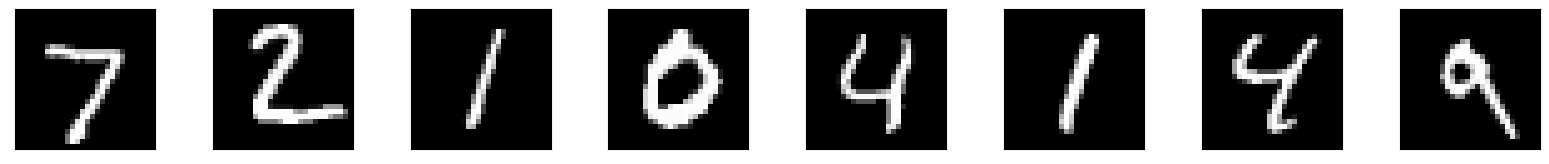

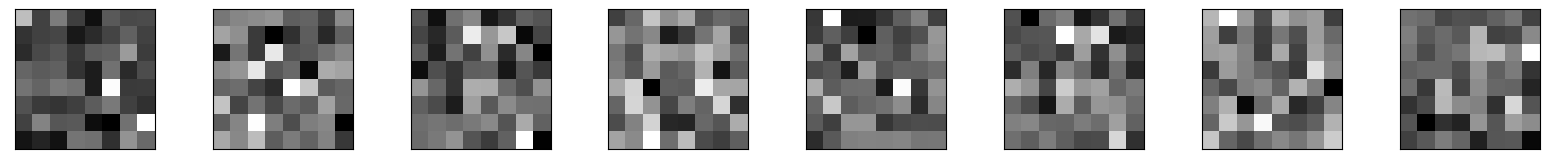

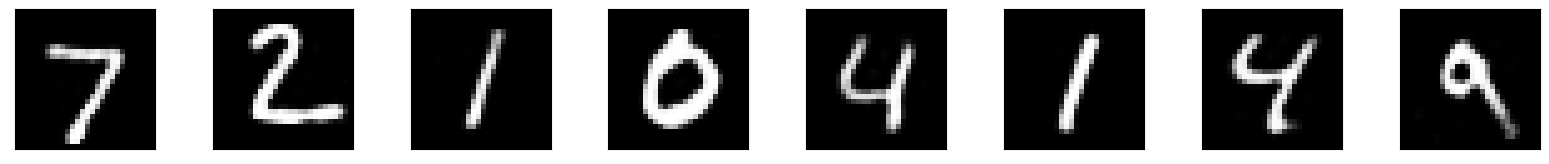

In [14]:
visualize(x_test, 28)
visualize(encoded_images, 8)
visualize(decoded_images, 28)